# Prédiction de revenus : cibler de nouveaux clients potentiels 
*Etude data - Projet 7 - Nicolas Pasero (avril 2020)*\
*OpenClassrooms - ENSAE-ENSAI Formation Continue*\
*Traitement des données sur Jupyter Notebook (Distribution Anaconda)*\
*Etude réalisée en langage Python*

---

## Modélisation : étude de l'ANOVA 

Ici il sera question d'expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenu des parents, etc.
*L'Analyse de la Variance permettra d'expliquer l'influence de notre variable explicative, le pays de l'individu*. Puis pour finir la performance du modèle sera étudiée.

In [104]:
from scipy.stats import t, shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [105]:
#Rappel de l'échantillon final précédemment obtenu
display(df_wid500.head())
display(df_wid500.shape)

,country_code,country,quantile,c_k_parent,population,income,income_avg,gini
0,ALB,Albania,1,1,3002678.0,728.89795,2994.829902,0.3
1,ALB,Albania,2,1,3002678.0,916.66235,2994.829902,0.3
2,ALB,Albania,3,1,3002678.0,1010.91600,2994.829902,0.3
3,ALB,Albania,4,1,3002678.0,1086.90780,2994.829902,0.3
4,ALB,Albania,5,1,3002678.0,1132.69970,2994.829902,0.3


(5800000, 8)

### ANOVA à un facteur variable explicative le pays de l’individu 
Réalisation de l'ANOVA en n’incluant comme variable explicative que le pays de l’individu, puis analyse de la performance du modèle.<br>
<em>Utilisation de statsmodels</em>

#### Première approche par représentation visuelle Boxplot selon les 9 pays identifiés lors du clustering
Il est intéressant d'avoir un *premier aperçu pouvant montrer l'influence d'un pays sur le revenu moyen des individus*.

In [106]:
#Rappel des pays identifiés lors du clustering et restriction sur notre échantillon "df_wid500"
country_list =['Luxembourg', 'Sweden', 'Spain', 'France', 'Crotia', 'Norway', 'United States', 'Denmark', 'Austria']
df_wid500_country_list = df_wid500[df_wid500['country'].isin(country_list)]

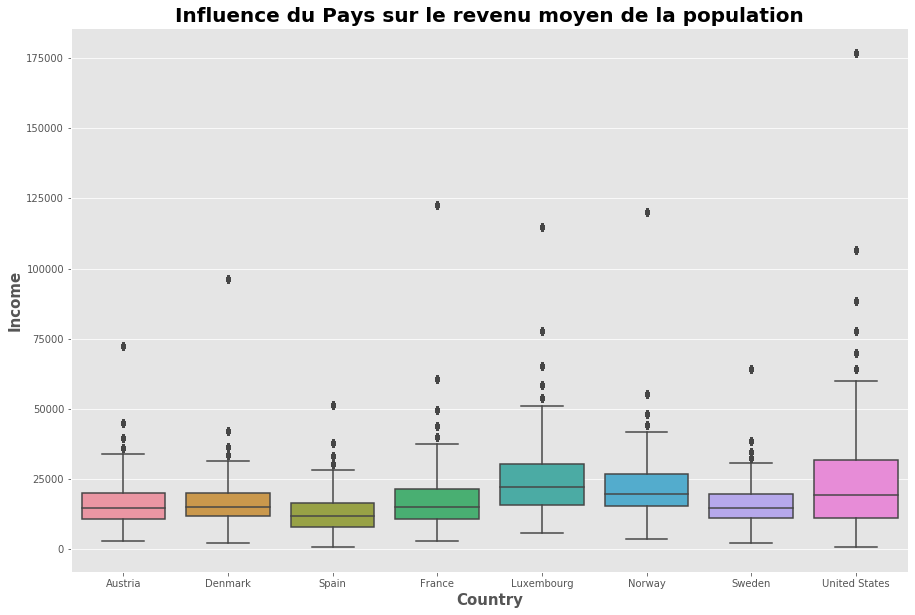

In [107]:
#Représentation des distributions par boxplot 
plt.figure(figsize=(15, 10))

ax = sns.boxplot(x="country", y="income", data=df_wid500_country_list)
plt.title('Influence du Pays sur le revenu moyen de la population', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=15, fontweight='bold')
plt.ylabel('Income', fontsize=15, fontweight='bold')

plt.savefig('p7_graphic/distribution_income_country_selection.jpg')
plt.show()

*Les pays semblent assez différentes, même si l'ordre de grandeur de ces écarts n'est pas très grand. La question sera de savoir si ces écarts sont significatifs ou pas.* **C'est l'ANOVA qui nous permettra de répondre à cette question.**

In [108]:
#Anova pour tester l'influence du pays de l’individu sur le revenu moyen des individus 
anova_income = smf.ols('income ~ country_code', data=df_wid500).fit()
print(anova_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:08:09   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


**R² = 0.496**, on peut en conclure que la variable explicative *Pays* explique près de *50% de la variance du revenu de l'individu*. Le reste, donc la moitié de la variance sur le revenu est expliquée par les autres facteurs non considérés dans ce modèle.

#### Test de Fisher 

In [109]:
#Affichage des resultats du test de Fisher (influence de la variable pays)
import statsmodels.api as sm
sm.stats.anova_lm(anova_income, typ=2)

,sum_sq,df,F,PR(>F)
country_code,2.551188e+14,115.0,49710.75889,0.0
Residual,2.588293e+14,5799884.0,NaN,NaN


La p-valeur de ce test (~0.0) est très petite et largement inférieure à 5%. On rejette donc l'hypothèse H0 selon laquelle $α_{country1}=α_{country2}=α_{country...}=0$.
*Le pays a donc bien une influence sur le revenu moyen des individus, comme nous en avions l'intuition en regardant les boxplot…*

#### Comparaison de l'ANOVA avec le logarithme du revenu de l'individu :
Le modèle sera t-il plus performant? Le but ici est de pouvoir déterminer l'impact du logarithme sur l'ANOVA.

In [110]:
#Calcul et intégration de la variable logarithmique 'ln_income'
df_wid500['ln_income'] = np.log(df_wid500['income'])

In [111]:
#Nouvelle Anova pour tester l'influence du pays de l’individu sur le logarithme du revenu moyen des individus 
anova_ln_income = smf.ols('ln_income ~ country_code', data=df_wid500).fit()
print(anova_ln_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.358e+05
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:10:27   Log-Likelihood:            -6.3135e+06
No. Observations:             5800000   AIC:                         1.263e+07
Df Residuals:                 5799884   BIC:                         1.263e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


En considérant le logarithme du revenu, la variance expliquée est plus concluante, **73% contre 50% précédemment.**

### Regression Linéaire
Régression linéaire sur nos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par le(s) modèle(s) ?

#### Première Régression Linéaire : Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu

In [112]:
#Création du premier modèle de Régression linéaire
modele1 = smf.ols('income ~ gini + income_avg', data=df_wid500).fit()
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:13:10   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.826e-09     14.870  -2.57e-10      1.0

**Ce modèle n'explique que 50% de la variance**, nous ne sommes pas plus performant que l'ANOVA. Il peut s'agir d'un problème de linéarité, car les salaires ont tendance à évoluer de manière exponentielle. Nous analyserons ce modèle plus bas pour vérifier cette hypothèse.

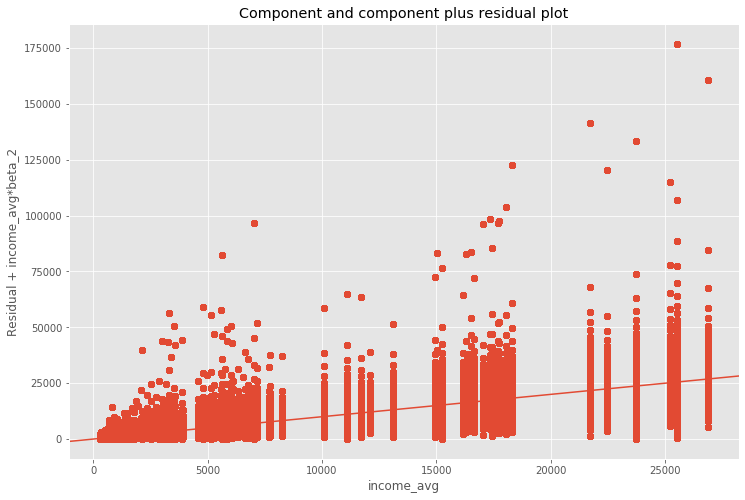

In [113]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele1, "income_avg", ax=ax)

*Maintenant je vais comparer la performance du premier modèle avec un second modèle incluant le logarithme du revenu moyen du pays*.

#### Seconde Régression Linéaire : Logarithme du Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu

In [114]:
#Calcul et intégration de la variable logarithmique 'ln_income_avg'
df_wid500['ln_income_avg'] = np.log(df_wid500['income_avg'])

In [115]:
#Création d'un second modèle de Régression linéaire à des fins de comparaison selon le logarithme 
modele2 = smf.ols('ln_income ~ gini + ln_income_avg', data=df_wid500).fit()
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.774e+06
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:13:51   Log-Likelihood:            -6.3234e+06
No. Observations:             5800000   AIC:                         1.265e+07
Df Residuals:                 5799997   BIC:                         1.265e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4670      0.003    161.378

*Comme lors de l'étude de l'ANOVA, la version logarithmique est plus perfomante. Il ressort que le modèle 2, en prenant donc le logarithme du revenu et le logarithme du revenu moyen, la performance est plus optimale. Les p-valeurs sont d'ailleurs très faibles.*

Nous retrouvons le même niveau de performance que dans l'ANOVA du logarithme du revenu. **Le modèle 2 peut expliquer 73% de la variance**, le restant peut s'expliquer sur d'autres critères non pris en compte jusqu'ici, à savoir les classes de revenu des parents, ou encore des critères sociaux professionels, etc…

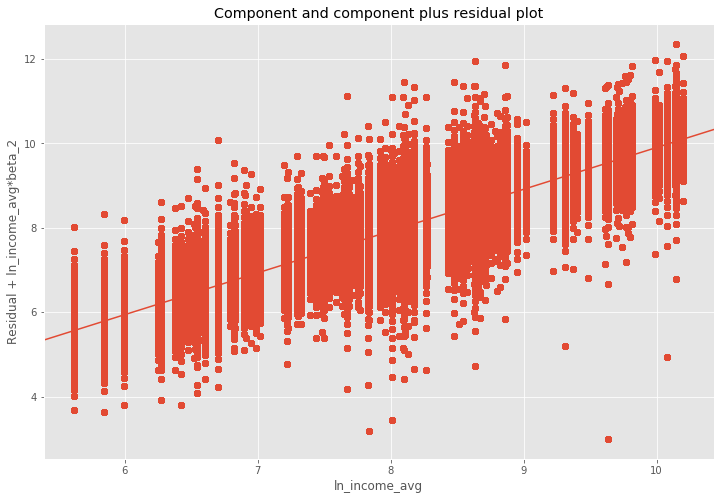

In [116]:
#Approche visuelle rapide de notre régression linéaire (cette fois-ci bien plus optimale)
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele2, "ln_income_avg", ax=ax)

La seconde approche visuelle de la régression linéaire est également plus représentatrice.

#### Comparaison des régressions linéaires en utilisant Scikit-Learn :

In [117]:
#Premier modèle (sans logarithme)
from sklearn import linear_model
X = df_wid500[['income_avg', 'gini']]
y = df_wid500['income']

model1 = linear_model.LinearRegression().fit(X, y)
model1.score(X, y)

0.4963901423109963

In [118]:
#Second modèle (avec logarithme)
from sklearn import linear_model
X = df_wid500[['ln_income_avg', 'gini']]
y = df_wid500['ln_income']

model2 = linear_model.LinearRegression().fit(X, y)
model2.score(X, y)

0.7283128748185064

Cette comparaison rapide permet de conforter les précédents résultats, *les modèles sont plus performants avec logarithme*, ainsi **la variance expliquée permet de comprendre près de 73% le revenu des individus.**

### Diagnostic de la régression linéaire des deux modèles (sans et avec logarithme)

#### Normalité des résidus
L’inférence dans la régression linéaire multiple repose sur l’hypothèse de normalité des erreurs. *Une première vérification importante consiste à vérifier la compatibilité des résidus (l’erreur observée sur l’échantillon)*. 

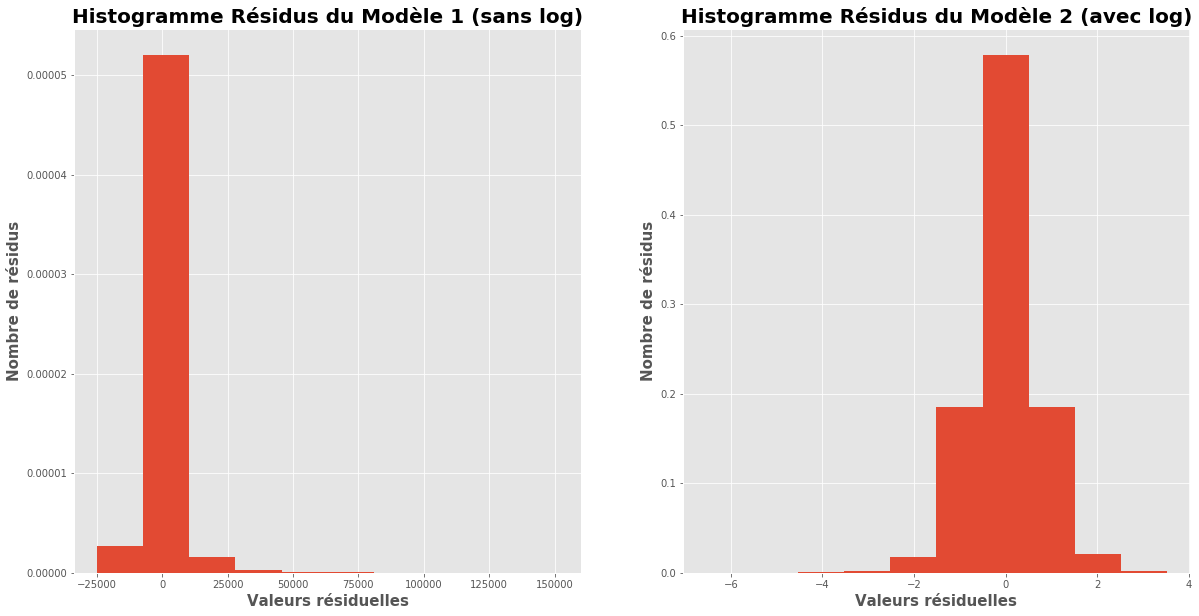

In [119]:
#Visualisation de la normalité des résidus : 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(modele1.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle 1 (sans log)', fontsize=20, fontweight='bold')

plt.subplot(122)
plt.hist(modele2.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle 2 (avec log)', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/residus_distribution_model1_model2.jpg')
plt.show()

Le modèle 1 (sans logarithme) renvoie une distribution des résidus qui semble suivre plus difficilement une loi normale, *tandis que le second modèle propose une distribution plus gaussienne, plus homogène.*

#### Autre visualisation de la distribution des résidus :

*Le graphique qqplot permet de vérifier la compatibilité de deux distributions*. Dans notre cas, nous confrontons la distribution empirique des résidus avec la distribution théorique de la loi normale. *On parle aussi de Droite de Henry*. L’hypothèse nulle (normalité) est rejetée si la série de points s’écarte manifestement de la diagonale. 

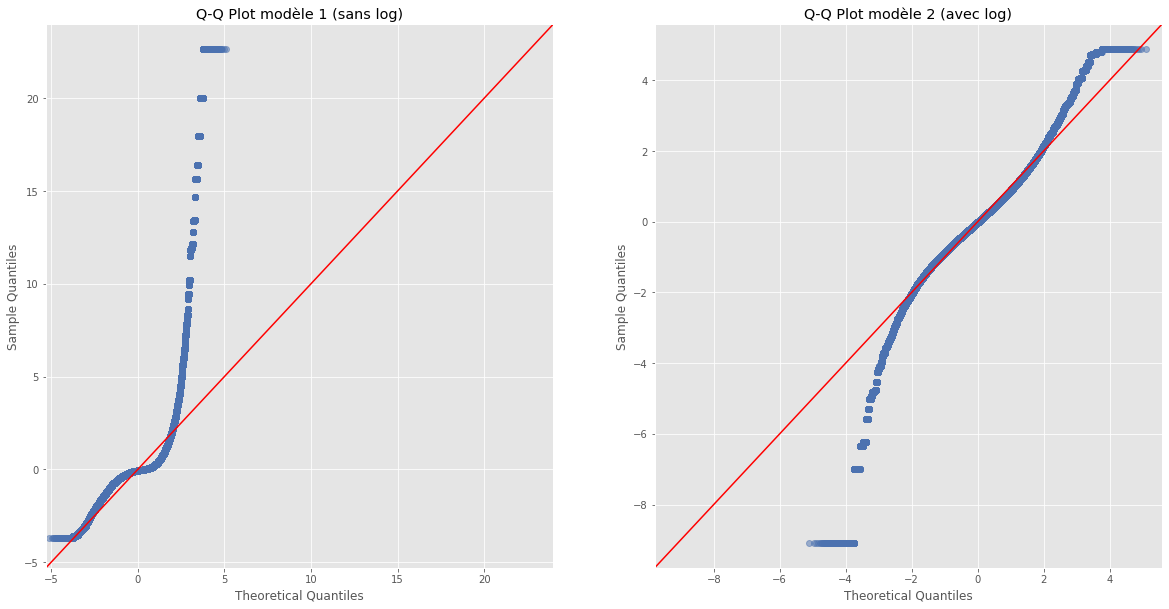

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

model_norm_residuals1 = modele1.get_influence().resid_studentized_internal
model_norm_residuals2 = modele2.get_influence().resid_studentized_internal

QQ1 = ProbPlot(model_norm_residuals1)
QQ2 = ProbPlot(model_norm_residuals2)

QQ1.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[0])
QQ2.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[1])
ax[0].set_title('Q-Q Plot modèle 1 (sans log)')
ax[1].set_title('Q-Q Plot modèle 2 (avec log)')
                
plt.savefig('p7_graphic/qqplot_model1_model2.jpg')
plt.show()

*Le Q-Q plot vient confirmer que le modèle 2 issu des logarithmes propose une distribution des résidus plus alignée avec la distribution théorique d'une loi normale.*

### Test d'adéquation à une loi normale : la statistique de Kolmogorov-Smirnov
On peut se douter que la distribution de nos résidus n'est pas "parfaite". Vérifions-le par les chiffres. L'échantillon étant de forte volumétrie, le test se fera selon Kolmogorov-Smirnov et non Shapiro-Wilk.

In [121]:
from scipy.stats import ks_2samp

In [122]:
#Modèle 1 non logarithmique
X_ln2 = modele1.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(modele1.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

Ks_2sampResult(statistic=0.24682379310344826, pvalue=0.0)

In [123]:
#Modèle 2 logarithmique
X_ln2 = modele2.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(modele2.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

Ks_2sampResult(statistic=0.03463741379310345, pvalue=0.0)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0.0 < 0.05).<br>

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille très importante, permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant parfaitement gaussien.

### Test de colinéarité de nos deux modèles
Vérification d'une éventuelle colinéarité approchée des variables.

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
#Modèle 1 non logarithmique
variables = modele1.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1146480635861415, 1.1146480635860736]

In [126]:
#Modèle 2 logarithmique
variables = modele2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.063303130310494, 1.0633031303104905]

**Aucun problème de colinéarité, en effet nos coefficients sont inférieurs à 10 et même à 5.**

### Test d’homoscédasticité (constance des variables ) par Breusch-Pagan
Ce test consiste à vérifier la constance de la variation des résidus. En cas d'hétéroscédasticité, la variance de l'erreur n'est pas constante. Dans le cas contraire, (hypothèse d'homoscédasticité) la variance de l'erreur est constante.

In [127]:
__, pval, __, f_pval = sms.het_breuschpagan(modele1.resid, modele1.model.exog)
print('Modèle 1 p value test Breusch-Pagan:', pval)

__, pval, __, f_pval = sms.het_breuschpagan(modele2.resid, modele2.model.exog)
print('Modèle 2 p value test Breusch-Pagan:', pval)

Modèle 1 p value test Breusch-Pagan: 0.0
Modèle 2 p value test Breusch-Pagan: 0.0


H0: Homoscédasticité et H1: Hétéroscédasticité<br>
Rejet de l'hypothèse H0, il y a hétéroscédasticité des residus.<br>
Etant donné que nous travaillons sur un échantillon contenant 5,8 Millions d'observations, le modèle de régression linéaire multiple reste robuste. De ce fait, il peut supporter des écarts importants aux hypothèses gaussiennes et homoscédastiques.

### Détection des points atypiques et influents
Les deux précédents modèles, issus du résultat de la régression, seront utilisés pour analyser les points influents.<br>Les tests seront fait à un niveau $\alpha=5$%<br>
$n$ sera le nombre d'individus de l'échantillon, et $p$, le nombre de variables :

In [128]:
alpha = .05
n = len(df_wid500)
p = 3

In [129]:
#Création d'un dataframe spécifique à l'analyse des modèles
analyse = df_wid500.copy()
analyse.head()

,country_code,country,quantile,c_k_parent,population,income,income_avg,gini,ln_income,ln_income_avg
0,ALB,Albania,1,1,3002678.0,728.89795,2994.829902,0.3,6.591534,8.004643
1,ALB,Albania,2,1,3002678.0,916.66235,2994.829902,0.3,6.820739,8.004643
2,ALB,Albania,3,1,3002678.0,1010.91600,2994.829902,0.3,6.918612,8.004643
3,ALB,Albania,4,1,3002678.0,1086.90780,2994.829902,0.3,6.991092,8.004643
4,ALB,Albania,5,1,3002678.0,1132.69970,2994.829902,0.3,7.032359,8.004643


### Analyse des leviers avec seuil : 
Le seuil des leviers est de $2∗\frac{p}{n}$.<br>
Il est important d'identifier les observations qui peuvent fausser les résultats de la régression.

In [130]:
seuil_levier = 2*p/n

In [131]:
#Intégration de deux variables spécifiques à chacun des modèles
analyse['levier_modele1'] = modele1.get_influence().hat_matrix_diag
analyse['levier_modele2'] = modele2.get_influence().hat_matrix_diag

In [132]:
#Agrégation des données selon leurs pays, vision simplifiée du couple pays/levier
#Simplification du dataframe pour une visualisation et interprétation plus rapide
analyse_levier = analyse.groupby('country')[['country', 'levier_modele1', 'levier_modele2']].mean().reset_index()
analyse_levier.head()

,country,levier_modele1,levier_modele2
0,Albania,4.396533e-07,3.454774e-07
1,Argentina,3.214940e-07,4.019117e-07
2,Armenia,5.660381e-07,5.116446e-07
3,Austria,6.465388e-07,5.794310e-07
4,Azerbaijan,4.196795e-07,3.349978e-07


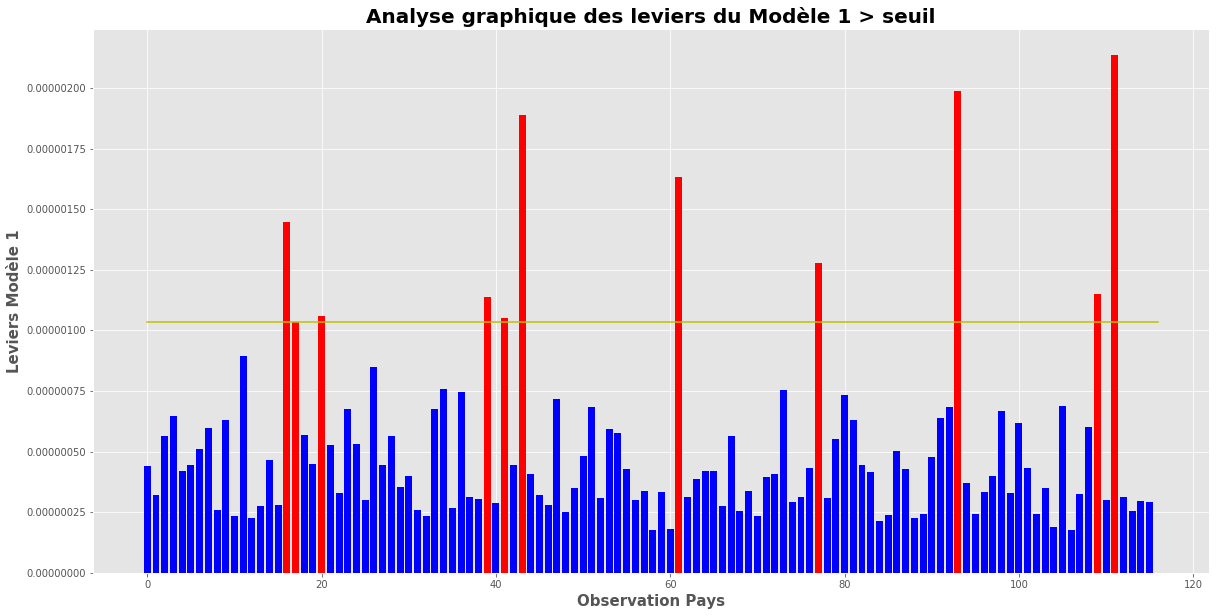

In [133]:
#Visualisation des leviers du Modèle 1 par pays avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_levier.loc[analyse_levier['levier_modele1'] <= seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele1'] <= seuil_levier]['levier_modele1'], color='b')
plt.bar(analyse_levier.loc[analyse_levier['levier_modele1'] > seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele1'] > seuil_levier]['levier_modele1'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Leviers Modèle 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Modèle 1 > seuil', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/levier_model1.jpg')
plt.show()

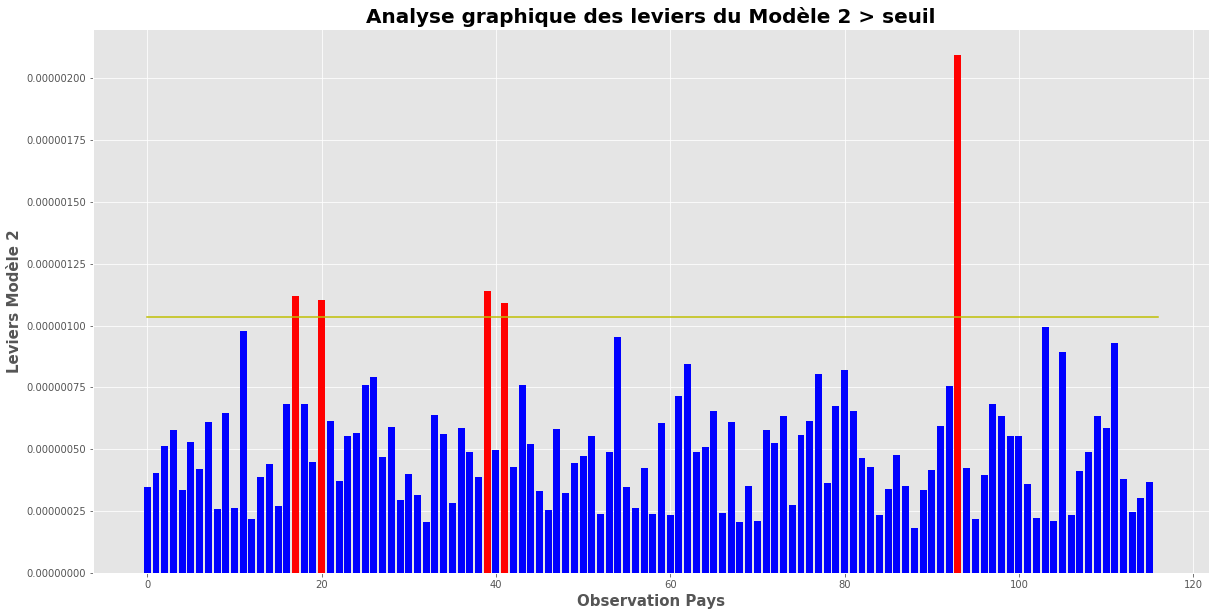

In [134]:
#Visualisation des leviers du Modèle 2 par pays avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_levier.loc[analyse_levier['levier_modele2'] <= seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele2'] <= seuil_levier]['levier_modele2'], color='b')
plt.bar(analyse_levier.loc[analyse_levier['levier_modele2'] > seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele2'] > seuil_levier]['levier_modele2'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Leviers Modèle 2', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Modèle 2 > seuil', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/levier_model2.jpg')
plt.show()

Il faut pouvoir jongler entre des observations graphiques et des métriques qui permettent de quantifier avec plus de précision une tendance, etc… Ici, il est nécessaire de ne pas s'arrêter aux précédents diagrammes, voyons immédiatement à quoi correspondent ces leviers, *quels sont ces pays hors seuil*?

In [135]:
#Liste des pays dont le levier est supérieur au seuil fixé
print('Pays issus du Modèle 1 sans log.')
display(analyse_levier[analyse_levier['levier_modele1'] > seuil_levier]['country'])
print('Pays issus du Modèle 2 avec log.')
display(analyse_levier[analyse_levier['levier_modele2'] > seuil_levier]['country'])

Pays issus du Modèle 1 sans log.


16              Canada
17     Central African
20            Colombia
39           Guatemala
41            Honduras
43             Iceland
61          Luxembourg
77              Norway
93        South Africa
109     United Kingdom
111      United States
Name: country, dtype: object

Pays issus du Modèle 2 avec log.


17    Central African
20           Colombia
39          Guatemala
41           Honduras
93       South Africa
Name: country, dtype: object

In [136]:
#Pourcentage de pays hors seuil levier
print("Modèle 1: " + str(round(len(analyse_levier[analyse_levier['levier_modele1'] 
                    > seuil_levier])/len(analyse_levier['levier_modele1'])*100, 2)) + '%')
print("Modèle 2 (avec log): " + str(round(len(analyse_levier[analyse_levier['levier_modele2'] 
                    > seuil_levier])/len(analyse_levier['levier_modele2'])*100, 2)) + '%')

Modèle 1: 9.48%
Modèle 2 (avec log): 4.31%


**Le Modèle 2, avec un R² = 0.728, est globalement significatif à 5%**. En comparaison le premier Modèle, sans logarithme, se révèle être moins significatif. Son R² = 0.496 plus faible mais avec le diagnostic des leviers, on constate également qu'un *plus grand nombre de pays viennent influencer le Modèle 1 (9.48% contre 4.31% avec le Modèle 2)*, donc sa performance est moins optimale.

### Analyse des résidus studentisés (standardisés) :
Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté.<br>
Il nécessaire d'observer le rôle conjoint du levier et du résidu standardisé.

In [137]:
#Intégration de deux nouvelles variables propres à chaque modèle
analyse['rstudent_modele1'] = modele1.get_influence().resid_studentized_internal
analyse['rstudent_modele2'] = modele2.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [138]:
#Agrégation des données selon leurs pays, vision simplifiée du couple pays-individu/rstudent
#Simplification du dataframe pour une visualisation et interprétation plus rapide
analyse_rstudent = analyse.groupby(['country', 'quantile']).mean().reset_index()

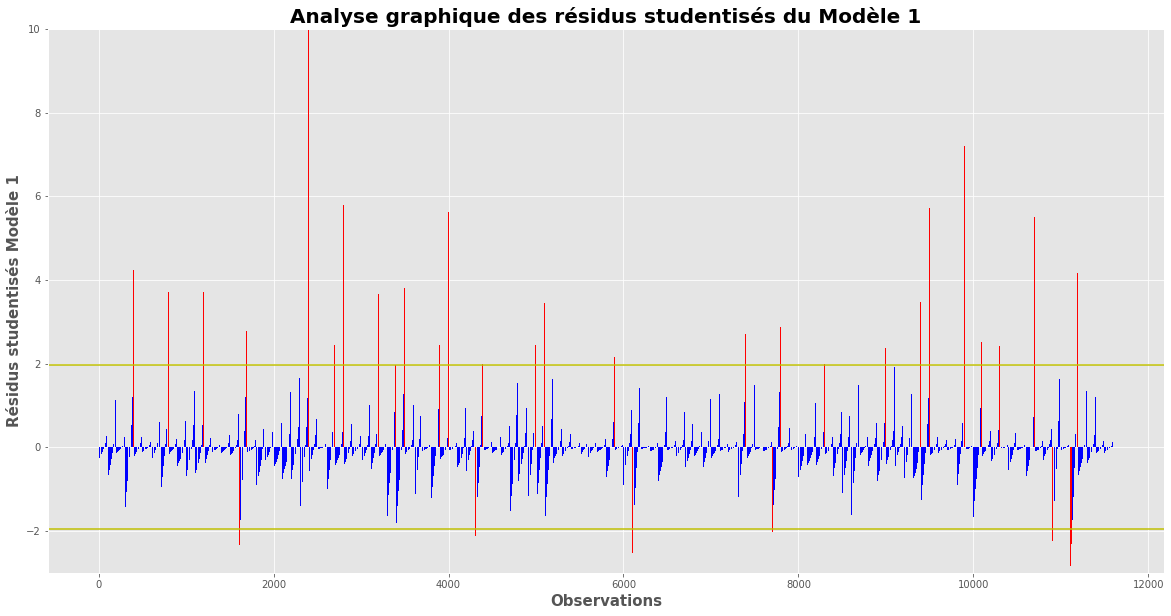

In [139]:
#Visualisation globale des résidus studentisés du Modèle 1 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['rstudent_modele1'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['rstudent_modele1'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['rstudent_modele1'], color='r')


plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés Modèle 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés du Modèle 1', fontsize=20, fontweight='bold')

plt.ylim(-3, 10)
plt.savefig('p7_graphic/residus_studentises_modele1.jpg')
plt.show()

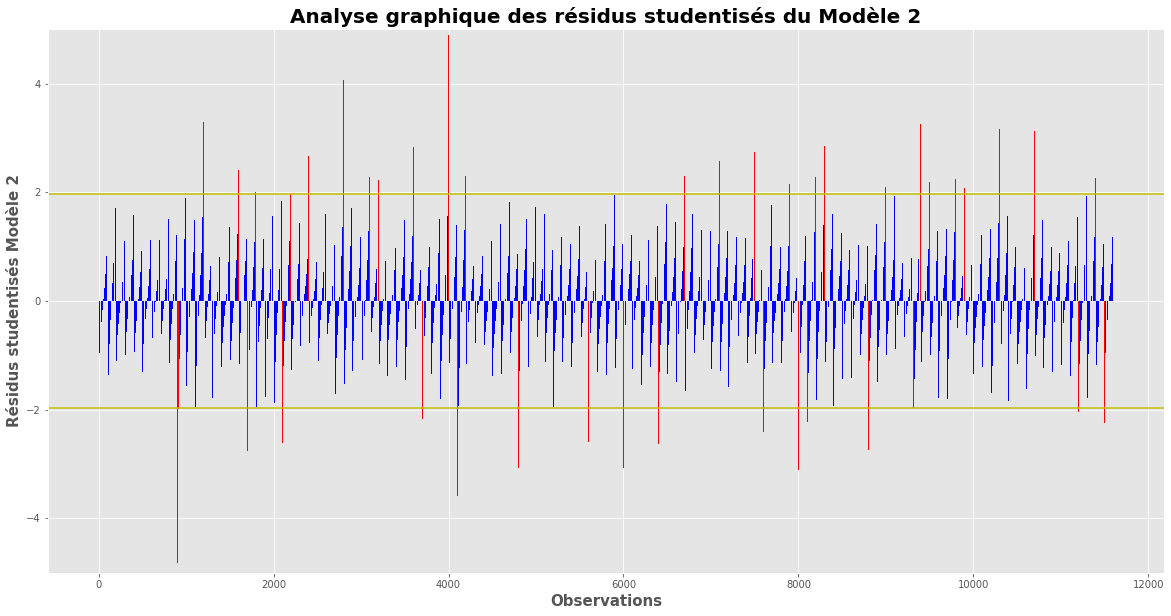

In [140]:
#Visualisation globale des résidus studentisés du Modèle 2 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['rstudent_modele2'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['rstudent_modele2'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['rstudent_modele2'], color='r')

plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés Modèle 2', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés du Modèle 2', fontsize=20, fontweight='bold')

plt.ylim(-5, 5)
plt.savefig('p7_graphic/residus_studentises_model2.jpg')
plt.show()

L'approche comparative visuelle n'apporte pas de conclusion significative. Il y a forcément des résidus hors seuil, mais à partir des graphiques l'analyse s'arrête là. *Voyons en pourcentage ce que peut représenter ces observations plus influentes que les autres*.

In [141]:
#Comparaison du nombre de valeurs influentes sur les deux modèles
print(str(len(analyse_rstudent[(analyse_rstudent['rstudent_modele1'] > seuil_rstudent) | 
                 (analyse_rstudent['rstudent_modele1'] < -seuil_rstudent)])), 
                 'Valeurs influentes dans le Modèle 1 (sans log)')

print(str(len(analyse_rstudent[(analyse_rstudent['rstudent_modele2'] > seuil_rstudent) | 
                 (analyse_rstudent['rstudent_modele2'] < -seuil_rstudent)])), 
                 'Valeurs influentes dans le Modèle 2 (avec log)')

410 Valeurs influentes dans le Modèle 1 (sans log)
635 Valeurs influentes dans le Modèle 2 (avec log)


In [142]:
#Pourcentage des observations les plus influentes (hors seuil)
print("Modèle 1: " + str((round(410 / len(analyse_rstudent['rstudent_modele1'])*100, 2))) + "%")
print("Modèle 2 (avec log): " + str((round(635 / len(analyse_rstudent['rstudent_modele2'])*100, 2))) + "%")

Modèle 1: 3.53%
Modèle 2 (avec log): 5.47%


**Les deux modèles proposés présentent entre 3 et 6% de résidus**, celà doit-être combiné avec les valeurs influentes trouvées avec le critère des leviers. Le Modèle 2 avec logarithme reste le favori, la variance est certe mieux expliquée, mais désormais nous avons une idée plus précises des pays influents via les leviers, c'est-à-dire 4% sur le second modèle, mais également une idée de la part des observations dont les résidus standardisés approchent les 6%.

### Analyse de la distance de Cook :
Toujours à l'aide de statsmodels la distance de Cook permettra de mieux estimer les influents.

In [143]:
influence1 = modele1.get_influence()
influence2 = modele2.get_influence()

cooks_d1 = influence1.cooks_distance[0]
cooks_d2 = influence2.cooks_distance[0]

In [144]:
#Intégration des distances de Cook dans "analyse"
analyse['dcooks1'] = cooks_d1
analyse['dcooks2'] = cooks_d2

In [145]:
#Seuil de la distance de Cook est de n-p. 
seuil_dcook = 4/(n-p)

In [146]:
#Simplification des données propres aux distances de Cook des deux modèles
analyse_dcook = analyse.groupby(['country', 'quantile']).mean().reset_index()

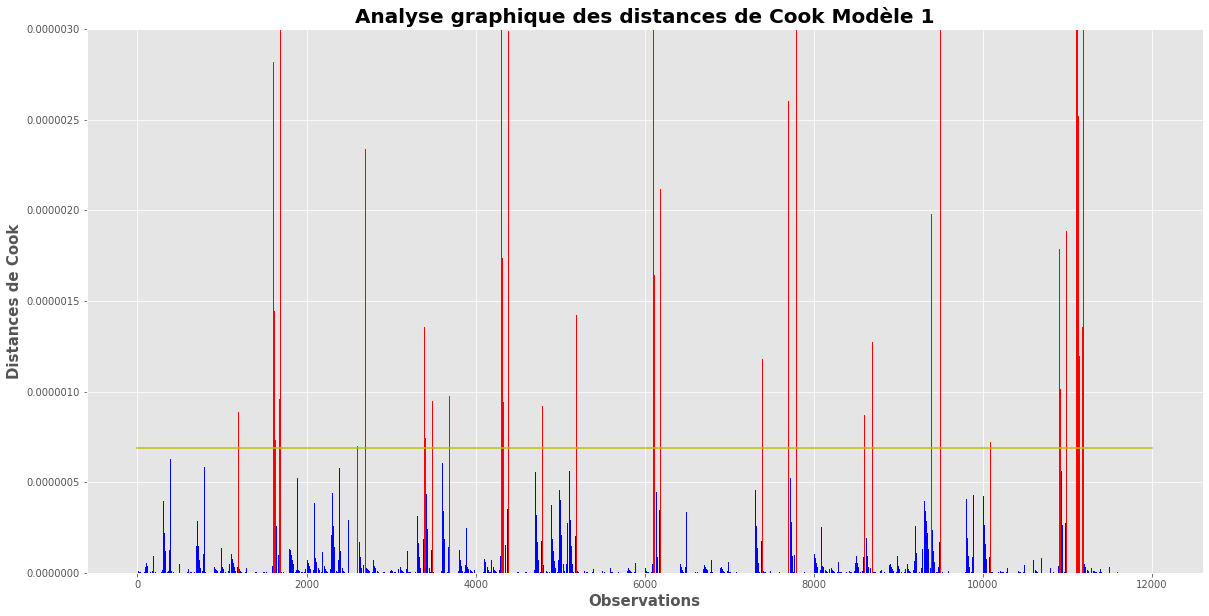

In [147]:
#Visualisation globale des distances de Cook du Modèle 1 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_dcook.loc[analyse_dcook['dcooks1'] < seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks1'] < seuil_dcook]['dcooks1'], color='b')
plt.bar(analyse_dcook.loc[analyse_dcook['dcooks1'] >= seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks1'] >= seuil_dcook]['dcooks1'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook Modèle 1', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/dcook_model1.jpg')
plt.show()

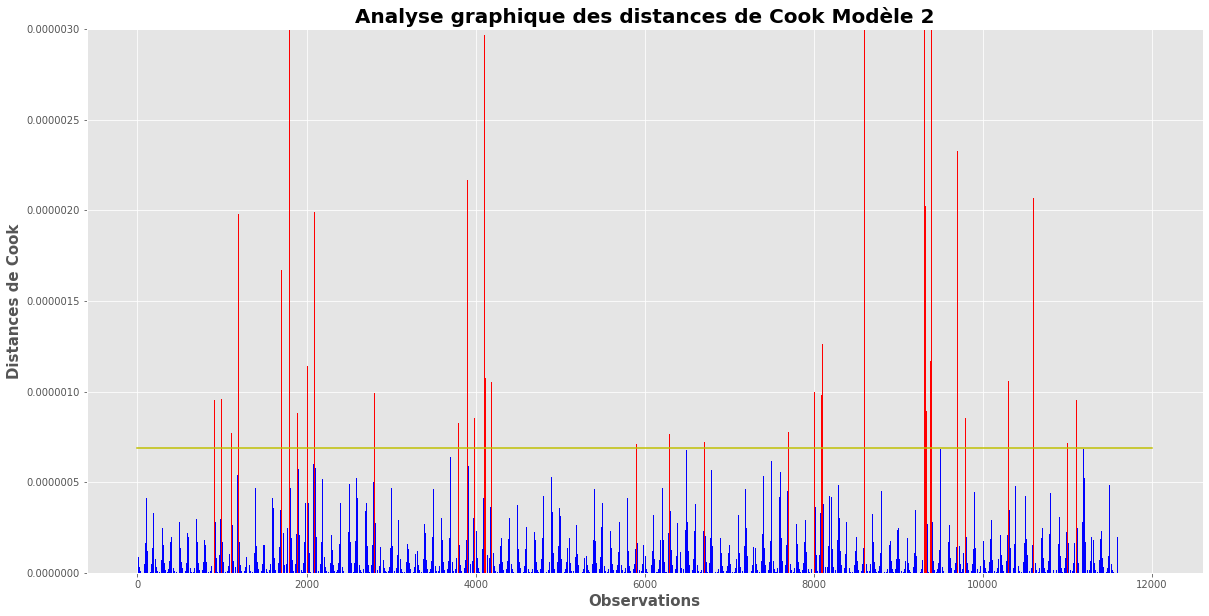

In [148]:
#Visualisation globale des distances de Cook du Modèle 2 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_dcook.loc[analyse_dcook['dcooks2'] < seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks2'] < seuil_dcook]['dcooks2'], color='b')
plt.bar(analyse_dcook.loc[analyse_dcook['dcooks2'] >= seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks2'] >= seuil_dcook]['dcooks2'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook Modèle 2', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/dcook_model2.jpg')
plt.show()

In [148]:
#Nombre d'observations influentes sur le critère de la distance de Cook
print(str(len(analyse_dcook[analyse_dcook['dcooks1'] > seuil_dcook])), 'valeurs influentes dans le Modèle 1')
print(str(len(analyse_dcook[analyse_dcook['dcooks2'] > seuil_dcook])), 'valeurs influentes dans le Modèle 2')

586 valeurs influentes dans le Modèle 1
662 valeurs influentes dans le Modèle 2


In [149]:
#Pourcentage des observations les plus influentes (hors seuil)
print("Modèle 1: " + str((round(586 / len(analyse_dcook)*100, 2))) + "%")
print("Modèle 2 (avec log): " + str((round(662 / len(analyse_dcook)*100, 2))) + "%")

Modèle 1: 5.05%
Modèle 2 (avec log): 5.71%


Sur ce critère de distance de Cook, les deux modèles sont plus ou moins identiques, on sait désormais que celà représente **5% des observations**.

### Amélioration du modèle le plus performant en incluant la classe de revenu des parents
Le précédent modèle en logarithme (ln) peut sans doute être encore optimisé en incluant une nouvelle variable, ici la classe de revenu des parents. Le modèle qui ressortira sera normalement plus performant, ce qui nous donnera également la part d'influence que peut avoir ce type de données sur le revenu des individus.

In [150]:
#Modèle de Régression linéaire avec ajout d'une variable supplémentaire 
modele2_parents = smf.ols('ln_income ~ gini + c_k_parent + ln_income_avg', data=df_wid500).fit()
print(modele2_parents.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 6.791e+06
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:34:34   Log-Likelihood:            -5.7325e+06
No. Observations:             5800000   AIC:                         1.147e+07
Df Residuals:                 5799996   BIC:                         1.147e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0737      0.003    -27.733

Le nouveau modèle est plus performant que son précédent (modele2), **soit 77.8% au lieu de 72.8%** - Le coefficient de détermination R² est plus élevé, l'influence du revenu des parents sur le revenu de l'enfant est substantielle, mis en évidence par le coefficient d'élasticité. Pour rappel, la corrélation entre le revenu de l'individu et le revenu de ses parents est mesurée par ce coefficient, le coefficient d'élasticité (mesure de la mobilité intergénérationnelle du revenu).

#### Test de normalité des résidus : 
Vérifions immédiatement la normalité des erreurs.

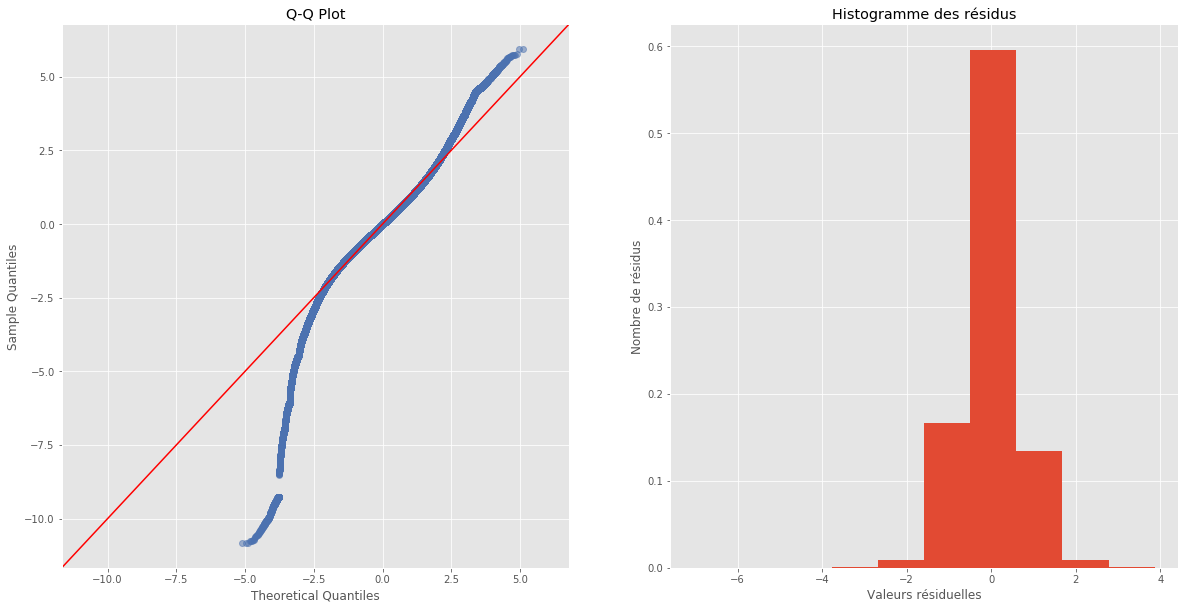

In [151]:
#Distribution des résidus
fig, ax = plt.subplots(1, 2, figsize=(20,10))

plt.hist(modele2_parents.resid, density=True)

model_norm_residuals = modele2_parents.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[0])

ax[0].set_title('Q-Q Plot')
ax[1].set_title('Histogramme des résidus')
ax[1].set_xlabel('Valeurs résiduelles')
ax[1].set_ylabel('Nombre de résidus')
                
plt.savefig('p7_graphic/qqplot_histo_residus_last_model.jpg')
plt.show()

*On retrouve sans surprise une distribution des résidus satisfaisante, alignée avec la distribution théorique d'une loi normale.*

### Test Kolmogorov-Smirnov (loi Normale)

In [152]:
X_ln2 = modele2_parents.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(modele2_parents.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

Ks_2sampResult(statistic=0.02822879310344828, pvalue=0.0)

Sans surprise avec les précésents résultats l'hypothèse de normalité est remise en cause (p-value = 0.0 < 0.05).<br>

Les résidus ne suivent pas totalement une loi Normale, mais les observations ne sont pas très différentes d'une distribution symétrique, et l'échantillon est de taille importante, les résultats du modèle ne sont pas absurdes.

### Diagnostic du Modèle 

In [153]:
#Paramètres nécessaires au lancement du diagnostic
alpha = .05        #test niveau 5%
n = len(df_wid500) #nombre d'individus de l'échantillon
p = 4              #nombre de variables

#Nouveau dataframe d'étude du modèle 
diagnostic = df_wid500.copy()
diagnostic.head()

,country_code,country,quantile,c_k_parent,population,income,income_avg,gini,ln_income,ln_income_avg
0,ALB,Albania,1,1,3002678.0,728.89795,2994.829902,0.3,6.591534,8.004643
1,ALB,Albania,2,1,3002678.0,916.66235,2994.829902,0.3,6.820739,8.004643
2,ALB,Albania,3,1,3002678.0,1010.91600,2994.829902,0.3,6.918612,8.004643
3,ALB,Albania,4,1,3002678.0,1086.90780,2994.829902,0.3,6.991092,8.004643
4,ALB,Albania,5,1,3002678.0,1132.69970,2994.829902,0.3,7.032359,8.004643


### Analyse des leviers avec seuil 

In [154]:
#Création de la variable levier
diagnostic['levier'] = modele2_parents.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

In [155]:
#Agrégation des données selon leurs pays, vision simplifiée du couple pays/levier
#Simplification du dataframe pour une visualisation et interprétation plus rapide
diagnostic_levier = diagnostic.groupby('country').mean().reset_index()

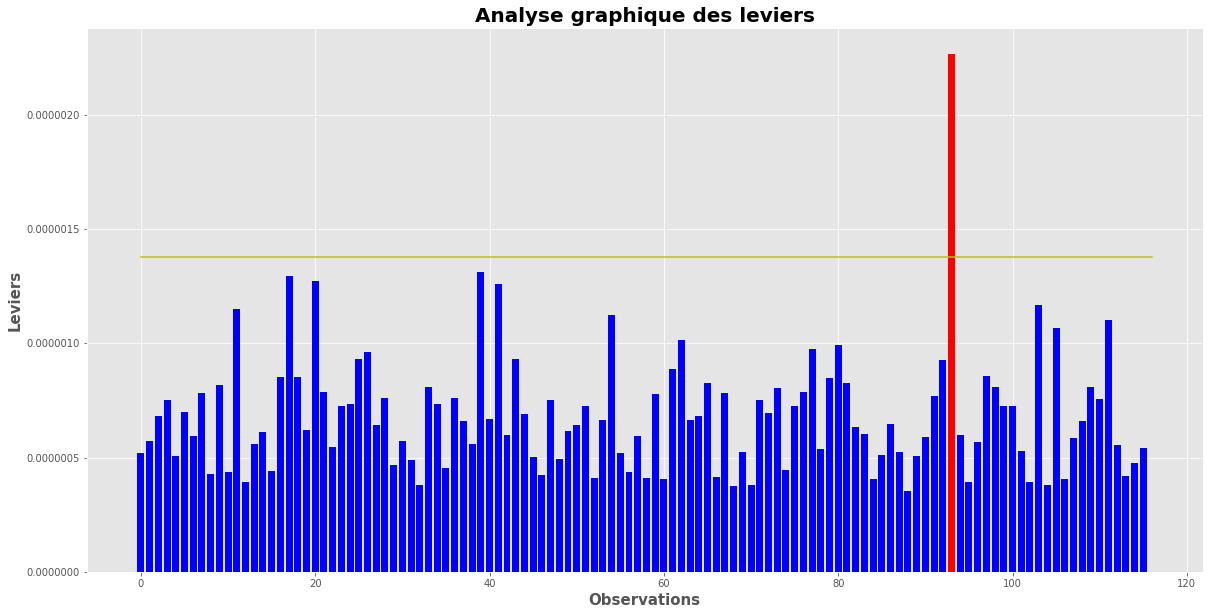

In [156]:
#Visualisation des leviers par pays avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_levier[diagnostic_levier['levier'] <= seuil_levier]['country'].index,
        diagnostic_levier[diagnostic_levier['levier'] <= seuil_levier]['levier'], color='b')
plt.bar(diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['country'].index,
        diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['levier'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Leviers', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/leviers_last_model.jpg')
plt.show()

In [157]:
#Identification du pays outlier sur le critère des leviers
diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['country']

93    South Africa
Name: country, dtype: object

*Ce n'est pas surprenant, il faut noter qu'en première partie de l'étude, dans la visualisation des distributions de nos variables, ce pays avait été identifié comme tel car son coefficient de Gini était bien trop élevé par rapport aux autres pays...*

### Analyse des résidus studentisés

In [158]:
#Intégration de la variable liée aux résidus
diagnostic['rstudent'] = modele2_parents.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [159]:
#Agrégation des données selon leurs pays, vision simplifiée du couple pays-individu/rstudent
#Simplification du dataframe pour une visualisation et interprétation plus rapide
diagnostic_rstudent = diagnostic.groupby(['country', 'quantile']).mean().reset_index()

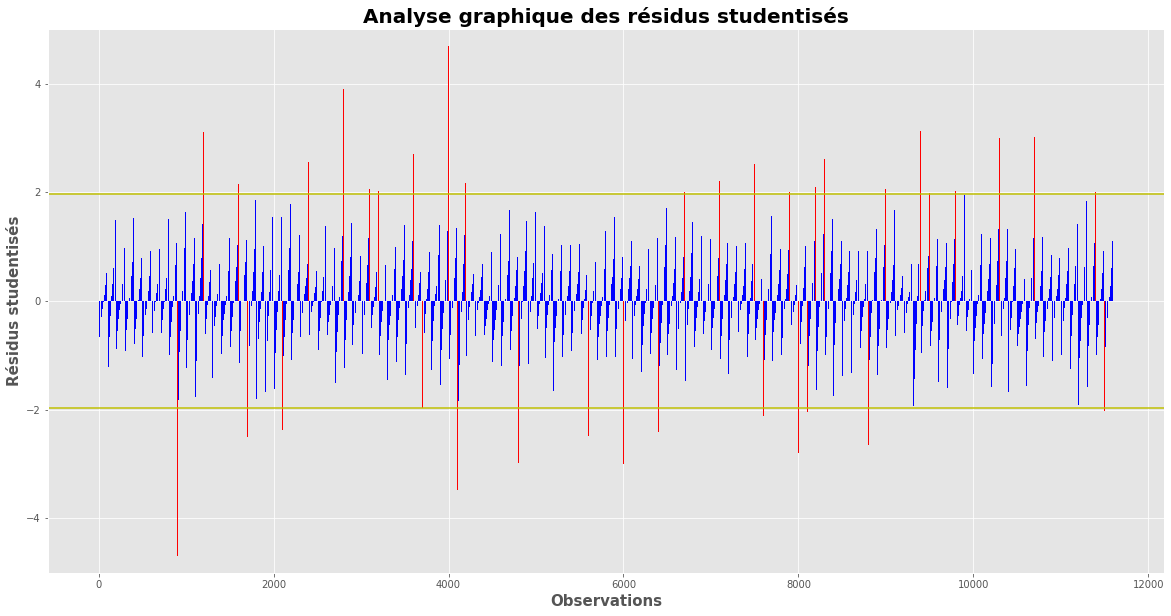

In [160]:
#Visualisation globale des résidus studentisés avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_rstudent[(diagnostic_rstudent['rstudent'] <= seuil_rstudent) & 
                            (diagnostic_rstudent['rstudent'] >= -seuil_rstudent)]['country'].index, 
        diagnostic_rstudent[(diagnostic_rstudent['rstudent'] <= seuil_rstudent) &
                            (diagnostic_rstudent['rstudent'] >= -seuil_rstudent)]['rstudent'], color='b')

plt.bar(diagnostic_rstudent[diagnostic_rstudent['rstudent'] > seuil_rstudent]['country'].index, 
        diagnostic_rstudent[diagnostic_rstudent['rstudent'] > seuil_rstudent]['rstudent'], color='r')
plt.bar(diagnostic_rstudent[diagnostic_rstudent['rstudent'] < -seuil_rstudent]['country'].index, 
        diagnostic_rstudent[diagnostic_rstudent['rstudent'] < -seuil_rstudent]['rstudent'], color='r')

plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés', fontsize=20, fontweight='bold')

plt.ylim(-5, 5)
plt.savefig('p7_graphic/residus_studentises_last_model.jpg')
plt.show()

In [160]:
#Pourcentage des observations hors seuil sur le critère des résidus standardisés
print(str(len(diagnostic_rstudent[(diagnostic_rstudent['rstudent'] > seuil_rstudent) | 
                 (diagnostic_rstudent['rstudent'] < -seuil_rstudent)])), 
                 'valeurs influentes dans le Modèle')
print('soit ' + str(round(477/len(diagnostic_rstudent), 2)*100) + '% valeurs plus influentes que les autres')

468 valeurs influentes dans le Modèle
soit 4.0% valeurs plus influentes que les autres


### Analyse de la distance de Cook :

In [161]:
influence = modele2_parents.get_influence()

cooks_d = influence1.cooks_distance[0]

In [162]:
#Intégration des distances de Cook dans "diagnostic"
diagnostic['dcooks'] = cooks_d

In [163]:
#Seuil de la distance de Cook est de n-p. 
seuil_dcook = 4/(n-p)

In [164]:
#Simplification des données propres à l'analyse de la distance de Cook
diagnostic_dcook = diagnostic.groupby(['country', 'quantile']).mean().reset_index()

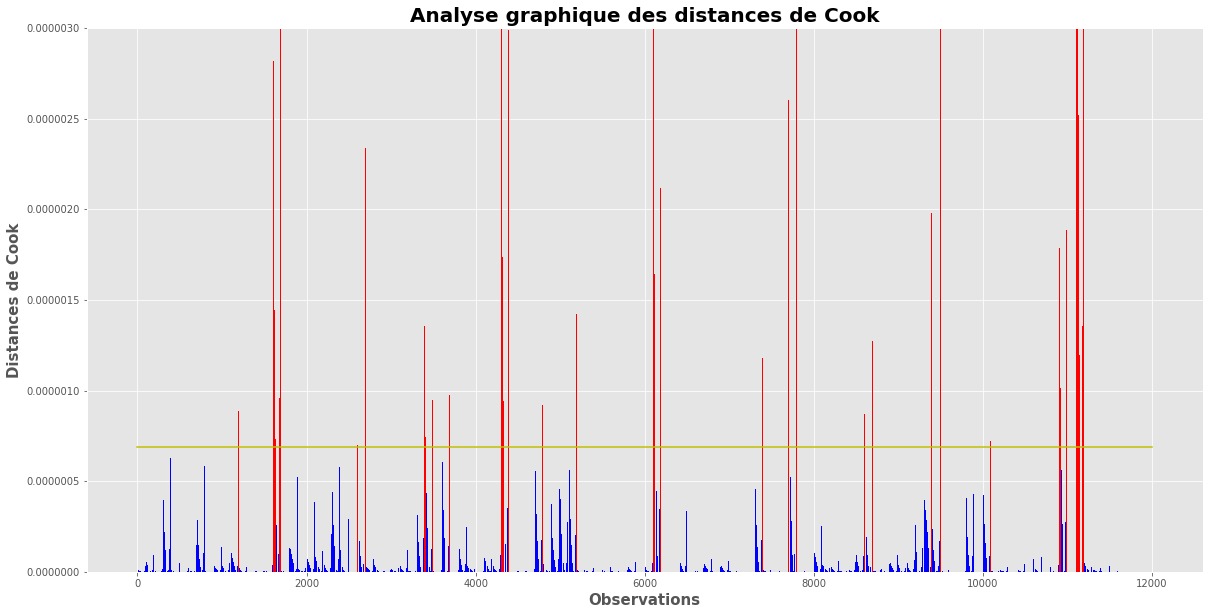

In [166]:
#Visualisation globale des distances de Cook avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_dcook[diagnostic_dcook['dcooks'] < seuil_dcook]['country'].index,
        diagnostic_dcook[diagnostic_dcook['dcooks'] < seuil_dcook]['dcooks'], color='b')
plt.bar(diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook]['country'].index,
        diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook]['dcooks'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook', fontsize=20, fontweight='bold')

plt.savefig('p7_graphic/dcook_last_model.jpg')
plt.show()

In [167]:
#Pourcentage des observations hors seuil sur le critère de la distance de Cook
print(str(len(diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook])) 
      + ' valeurs atypiques sur le critère de d. Cook')
print('soit ' + str(round(586/len(diagnostic_dcook), 2)*100) + '% des valeurs sont plus atypiques selon ce seuil.')

586 valeurs atypiques sur le critère de d. Cook
soit 5.0% des valeurs sont plus atypiques selon ce seuil.


### Test de colinéarité du dernier modèle
Ci-dessous test de vérification de la colinéarité approchée de nos variables.

In [165]:
variables = modele2_parents.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0633031303104725, 1.0, 1.0633031303104825]

**Aucun problème de colinéarité, en effet nos coefficients sont inférieurs à 10 et même à 5.**

### L’homoscédasticité par un test de Breusch-Pagan

On peut également tester l’homoscédasticité, la constance de la variance des résidus :

In [166]:
__, pval, __, f_pval = sms.het_breuschpagan(modele2_parents.resid, modele2_parents.model.exog)
print('p value test Breusch-Pagan:', pval)

p value test Breusch-Pagan: 0.0


Rejet de l'hypothèse H0 (les variances sont constantes), il y a hétéroscédasticité des residus.<br>
Ceci étant, le modèle de regression linéaire multiple est robuste pour les grands échantillons, ce qui est le cas dans notre contexte. Le modèle est capable de supporter des écarts important aux hypothèses homoscédastique et gaussienne.

### Décomposition de la variance totale expliquée
Formule de décomposition de la variance **SCT = SCE + SCR**

In [168]:
res_regr_log = sms.stats.anova_lm(modele2_parents, typ=2)
res_regr_log 

,sum_sq,df,F,PR(>F)
gini,1.097383e+05,1.0,2.596267e+05,0.0
c_k_parent,5.540179e+05,1.0,1.310735e+06,0.0
ln_income_avg,7.038685e+06,1.0,1.665263e+07,0.0
Residual,2.451526e+06,5799996.0,NaN,NaN


In [169]:
#SCT
regr_log_sct = res_regr_log.values[:,0].sum()
regr_log_sct

10153966.687247885

In [170]:
#SCE
regr_log_sce = res_regr_log.values[0,0]+res_regr_log.values[1,0]+res_regr_log.values[2,0]
regr_log_sce

7702441.154444799

In [171]:
#SCR
regr_log_scr = res_regr_log.values[2,0]
regr_log_scr

7038685.026526013

In [172]:
#R2 squared
regr_log_r2 = regr_log_sce/regr_log_sct
regr_log_r2

0.7585647453539613

In [173]:
#Variance expliquée par le revenu moyen du pays (ln_income_avg)
regr_log_sce_incomeavg = sm.stats.anova_lm(modele2_parents, typ=2).values[2,0]/regr_log_sct
regr_log_sce_incomeavg

0.6931955996434106

In [174]:
#Variance expliquée par l'indice de Gini
regr_log_sce_gini = sm.stats.anova_lm(modele2_parents, typ=2).values[0,0]/regr_log_sct
regr_log_sce_gini

0.010807426696892244

In [175]:
#Variance expliquée par la classe de revenu des parents
regr_log_sce_pa = sm.stats.anova_lm(modele2_parents, typ=2).values[1,0]/regr_log_sct
regr_log_sce_pa

0.05456171901365848

In [176]:
#Les résidus
regr_log_sce_residual = sm.stats.anova_lm(modele2_parents, typ=2).values[3,0]/regr_log_sct
regr_log_sce_residual

0.2414352546460386

A partir de notre dernier modèle, nous pouvons conclure à un rôle clé du pays de naissance : **69% de la variance expliquée.**\
La classe de revenu des parents explique 5.5% de la variance.\
L'indice de Gini compte pour seulement 1% de la variance.\
Puis le reste, les résidus…

**Une question se pose concernant le coefficient de régression associé à l’indice de Gini, est-il possible d'affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?**

Plus l’indice de Gini est élevé, plus les inégalités sont fortes, des écarts dans les salaires importants avec des revenus/individus plus bas dans le pays. L'exemple du précédent modèle est révélateur, on peut comprendre ce lien par le coefficient négatif au sein du modèle.

**Pour finir sur le dernier modèle, la décomposition de variance totale est expliquée différents éléments. Concluons en disant que la prédiction du revenu potentiel d'une personne peut s'appréhender selon la logique suivante :**

Le dernier modèle inclut la classe de revenu des parents, pour commencer l'analyse des résidus est sensiblement la même que sur le modèle précédent, c'est-à-dire que la loi normale est généralement suivie. A cela s'ajoute un gain sur le coefficient de détermination, R² = 0.778 (contre 0.728 sur le modèle précédent).

Il reste 22% de variance non expliquée par le modèle, à ce stade on peux supposer que ce restant correspond à d'autres  critères non traités ici, comme par exemple l'âge, le sexe, le niveau de qualification, etc…

[Retour vers la page notebook précédente (Étude des classes de revenu des parents)](https://github.com/nalron/project_income_analysis/blob/french_version/p7_notebook03.ipynb)